In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import regression_functions as reg_func # our own regression library
data = pd.read_csv("cleaned data.csv")

In [2]:
# Handling categorical variables using Label Encoding
label_encoders = {}
categorical_columns = ['countryOfCitizenship', 'industries', 'gender']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

In [3]:
# Selecting our single feature for simple OLS regression
simple_feature = 'age'
target = 'finalWorth'

# Performing simple OLS regression
simple_ols_model = reg_func.perform_simple_ols(data, target, simple_feature)

# Displaying model results
simple_ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     8.856
Date:                Wed, 06 Dec 2023   Prob (F-statistic):            0.00295
Time:                        12:53:50   Log-Likelihood:                -25418.
No. Observations:                2386   AIC:                         5.084e+04
Df Residuals:                    2384   BIC:                         5.085e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1677.2535   1063.752      1.577      0.115    -408.721    3763.228
x1            47.6959     16.027      2.976      0.003      16.267      79.125
==============================================================================
Omnibus:                     3712.587   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1848289.184
Skew:                           9.699   Prob(JB):                         0.00
Kurtosis:                     137.963   Cond. No.                         337.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

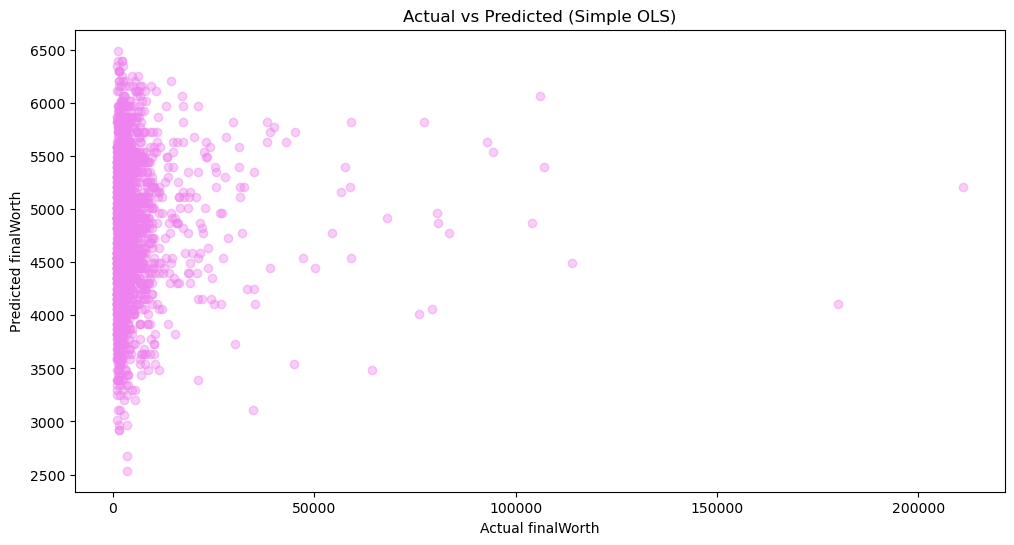

In [4]:
# Plot actual vs. predicted values for simple OLS
reg_func.plot_actual_vs_predicted(simple_ols_model, data, target='finalWorth', feature='age')

In [5]:
# Features for multiple linear regression
multiple_features = ['age', 'countryOfCitizenship', 'selfMade', 'industries', 'gender', 'cpi_country', 
                     'gdp_country', 'gross_tertiary_education_enrollment', 
                     'gross_primary_education_enrollment_country', 'life_expectancy_country', 
                     'total_tax_rate_country', 'population_country']

# Performing multiple linear regression
multiple_ols_model = reg_func.perform_multiple_ols(data, target, multiple_features)

# Displaying the summary of the multiple linear regression model
multiple_ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.801
Date:                Wed, 06 Dec 2023   Prob (F-statistic):            0.00124
Time:                        12:53:50   Log-Likelihood:                -25407.
No. Observations:                2386   AIC:                         5.084e+04
Df Residuals:                    2374   BIC:                         5.091e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                       1.981e+04   1.33e+04      1.486      0.137   -6332.626     4.6e+04
age                                           39.4646     16.534      2.387      0.017       7.043      71.886
countryOfCitizenship                           3.4420     14.563      0.236      0.813     -25.115      31.999
selfMade                                    -764.9297    519.477     -1.472      0.141   -1783.606     253.746
industries                                     5.2124     46.186      0.113      0.910     -85.356      95.781
gender                                       280.1848    693.807      0.404      0.686   -1080.345    1640.714
cpi_country                                  -24.1264     14.878     -1.622      0.105     -53.302       5.050
gdp_country                                 7.275e-11   4.68e-11      1.556      0.120    -1.9e-11    1.64e-10
gross_tertiary_education_enrollment           -0.3951     17.720     -0.022      0.982     -35.143      34.353
gross_primary_education_enrollment_country    -4.2786     53.618     -0.080      0.936    -109.422     100.865
life_expectancy_country                     -194.8653    117.395     -1.660      0.097    -425.073      35.342
total_tax_rate_country                        34.3946     27.336      1.258      0.208     -19.210      87.999
population_country                         -2.106e-06   9.49e-07     -2.218      0.027   -3.97e-06   -2.44e-07
==============================================================================
Omnibus:                     3705.070   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1837631.578
Skew:                           9.659   Prob(JB):                         0.00
Kurtosis:                     137.577   Cond. No.                     9.64e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.64e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

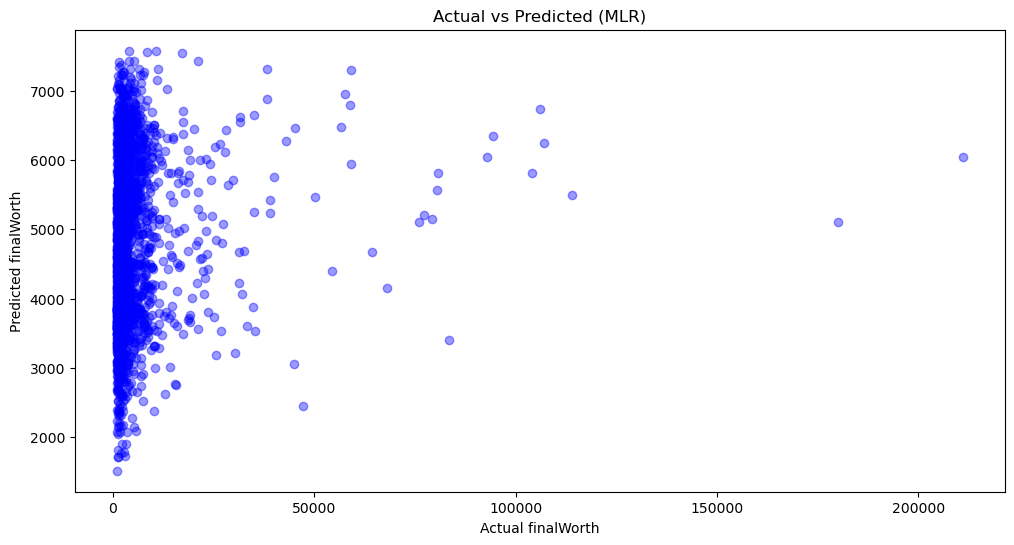

In [6]:
# Plot actual vs. predicted values for multiple OLS
reg_func.plot_actual_vs_predicted(multiple_ols_model, data,target='finalWorth', feature=multiple_features)

C:\Users\Joe Zhou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


FileNotFoundError: [Errno 2] No such file or directory: "outputs/Clustering_with_['finalWorth',_'gdp_country'].png"

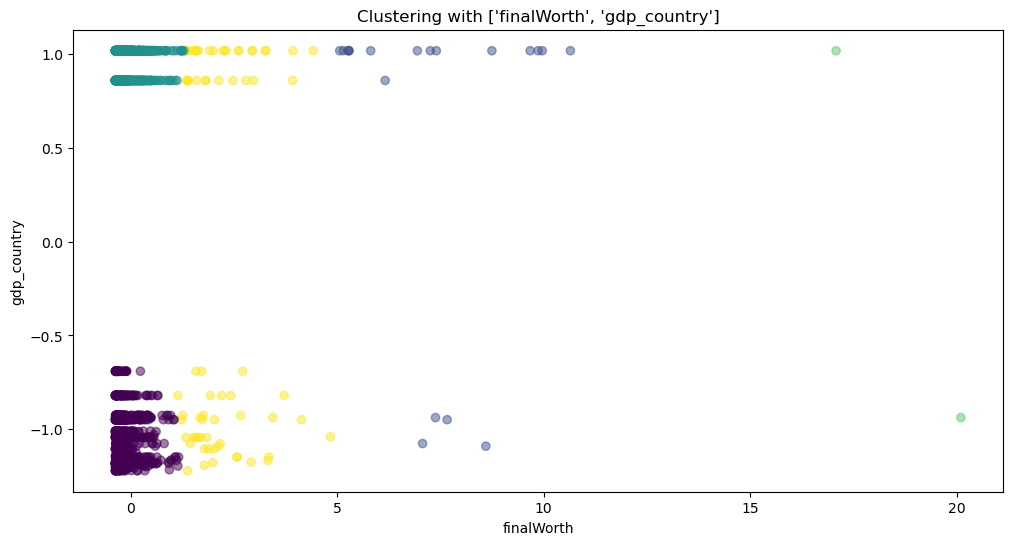

In [7]:
import clustering_functions as cf

feature_set_1 = ['finalWorth', 'gdp_country']
feature_set_2 = ['finalWorth', 'age']
feature_set_3 = ['finalWorth', 'gross_tertiary_education_enrollment']

# Preprocess and cluster for each feature set
for feature_set in [feature_set_1, feature_set_2, feature_set_3]:
    preprocessed_data = cf.preprocess_data_for_clustering(data, feature_set)
    cluster_labels = cf.perform_kmeans_clustering(preprocessed_data, n_clusters=5)
    cf.plot_clusters(preprocessed_data, cluster_labels, title=f'Clustering with {feature_set}');